# Interaktive Beitragskalkulation

<IPython.core.display.Javascript object>


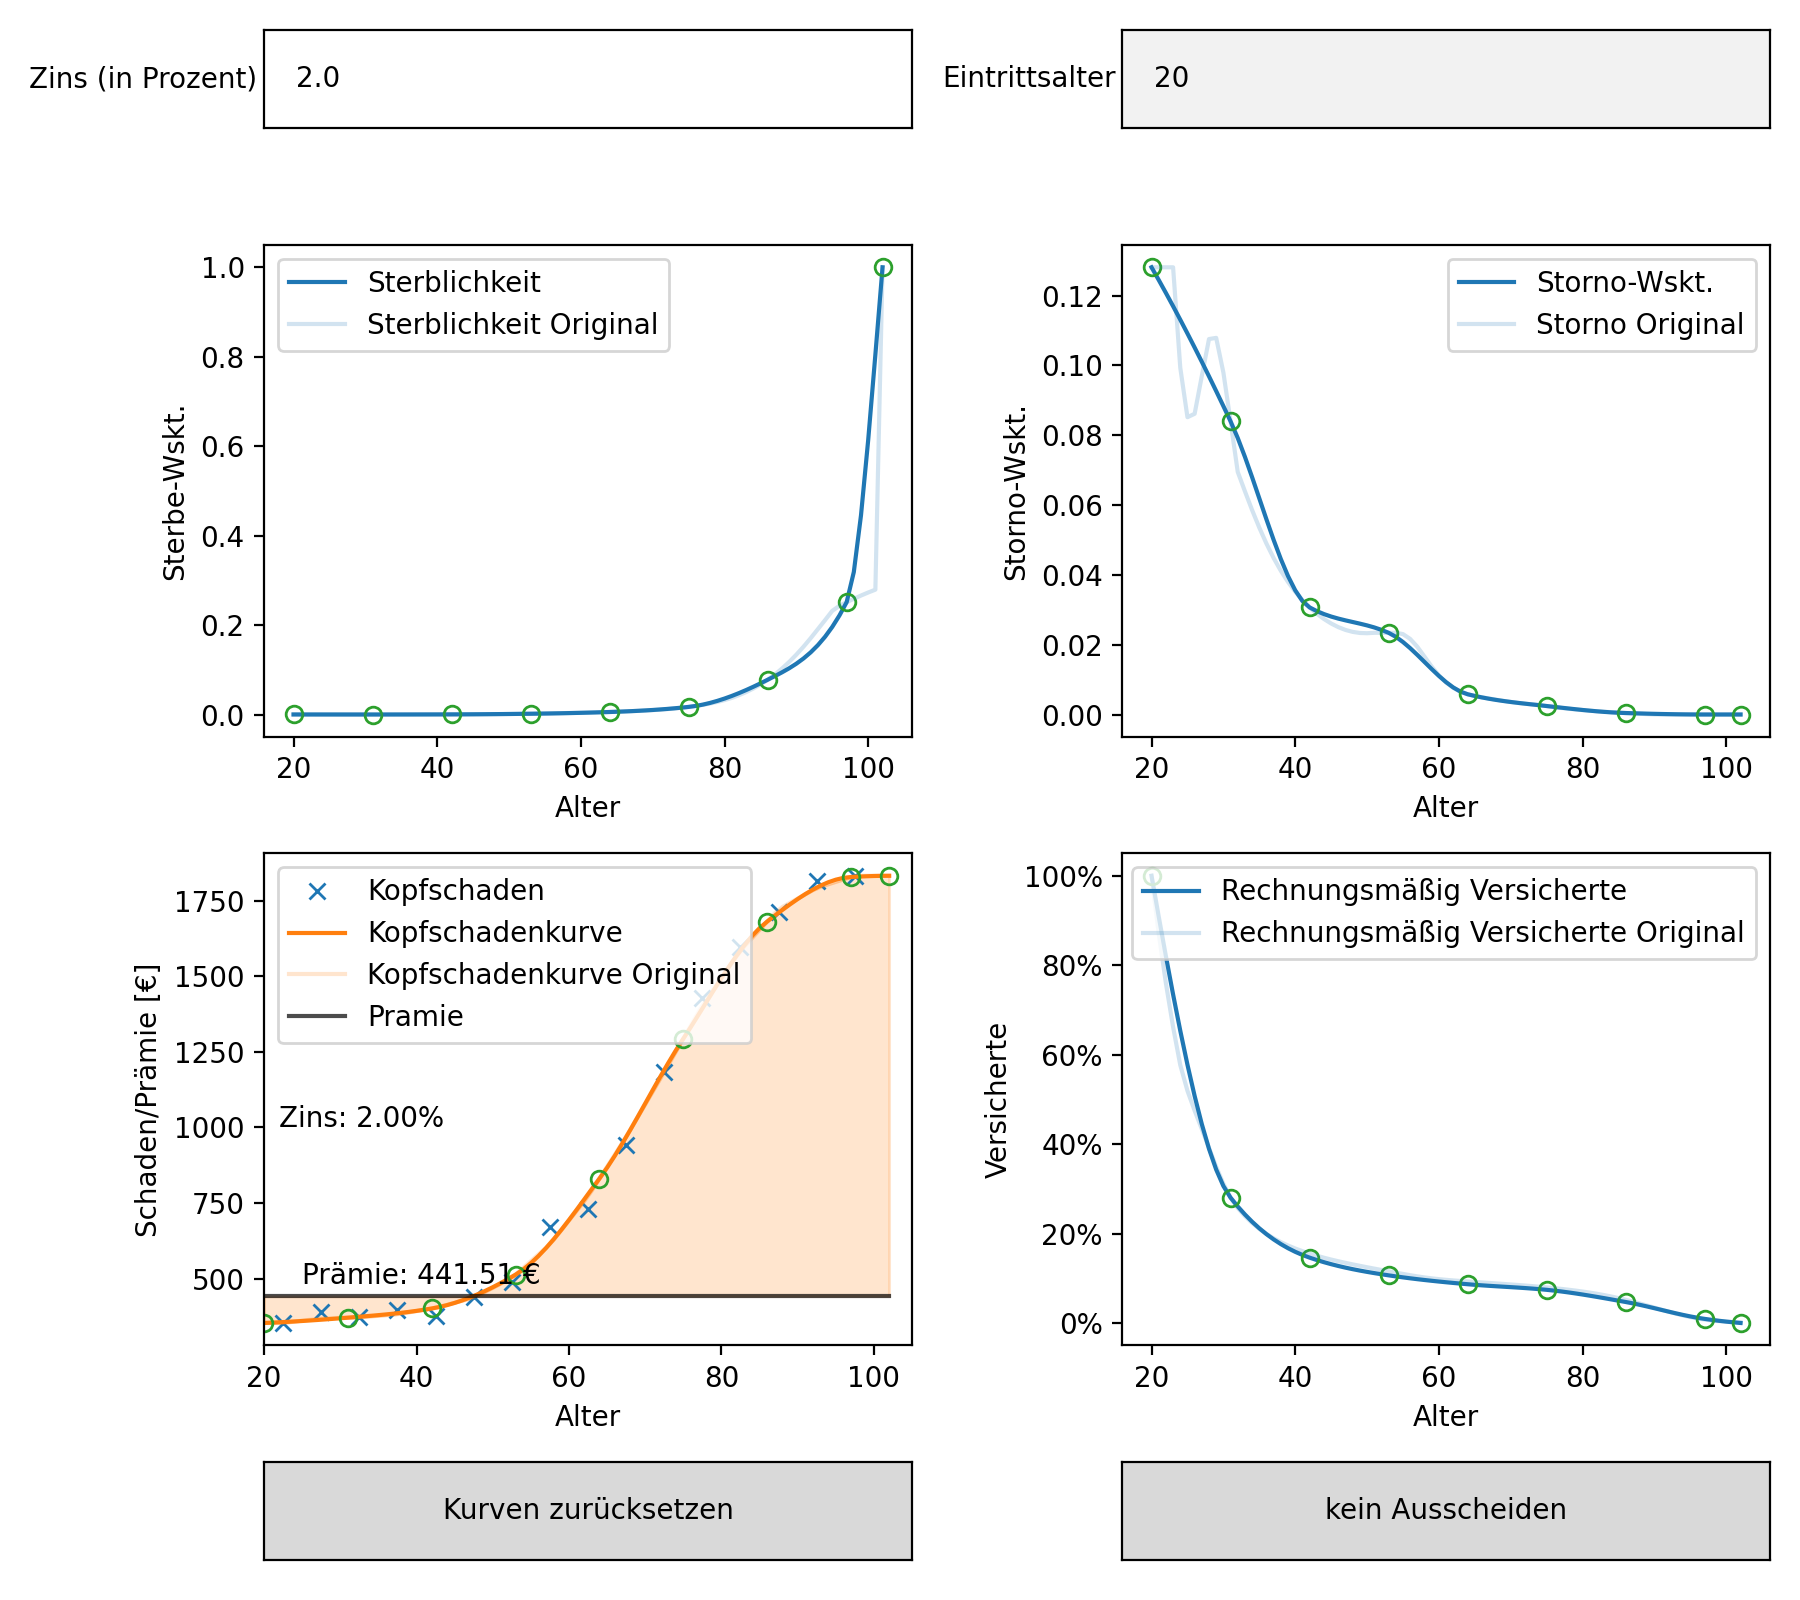

In [3]:
##Bitte Code ausführen: In das Feld klicken und dann "Shift" + "Enter" drücken

Zins = 0.02
Eintrittsalter = 20

#Notwendige Python Pakete laden
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.interpolate as interpolate 
import matplotlib.gridspec as gridspec
from matplotlib.widgets import TextBox
from matplotlib.widgets import Button
import matplotlib.ticker as mtick

#Vektor mit den verschiedenen Altern für Erwachsene im Rechenbeispiel
Alter_Storno_Sterblichkeit = np.array([ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,
        86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
        97.,  98.,  99., 100., 101., 102.])

#Vektor mit Sterbewahrscheinlichkeiten. Daten leicht modifizert von der BaFin Tafel übernommen.
Sterblichkeit = np.array([0.000353, 0.000382, 0.000402, 0.000414, 0.000398, 0.00038 ,
       0.000359, 0.000333, 0.000311, 0.000296, 0.000288, 0.000286,
       0.00029 , 0.000293, 0.000303, 0.000318, 0.00033 , 0.000348,
       0.000373, 0.000404, 0.000441, 0.000485, 0.000536, 0.000592,
       0.00065 , 0.00072 , 0.000805, 0.000909, 0.001035, 0.001185,
       0.001357, 0.001549, 0.001759, 0.001987, 0.002236, 0.002511,
       0.00282 , 0.003166, 0.003552, 0.003917, 0.004234, 0.004616,
       0.005023, 0.005416, 0.005877, 0.006425, 0.007037, 0.007701,
       0.008431, 0.009197, 0.010079, 0.011107, 0.012282, 0.013674,
       0.015323, 0.017251, 0.019457, 0.021933, 0.024876, 0.028366,
       0.032485, 0.037317, 0.043424, 0.050319, 0.058294, 0.067455,
       0.0779  , 0.089719, 0.102992, 0.117777, 0.134092, 0.151906,
       0.170997, 0.191134, 0.211354, 0.232032, 0.24325 , 0.25129 ,
       0.25896 , 0.26621 , 0.27302 , 0.27934 , 1 ])

#Vektor mit Stornowahrscheinlichkeiten. Daten leicht modifizert von der BaFin Tafel übernommen.
Storno = np.array([1.28111091e-01, 1.28111091e-01, 1.28111091e-01, 1.28111091e-01,
       9.93580300e-02, 8.51955870e-02, 8.61750460e-02, 9.70122360e-02,
       1.07571532e-01, 1.07907263e-01, 9.80066410e-02, 8.40200430e-02,
       6.95391040e-02, 6.39885510e-02, 5.86108590e-02, 5.35903320e-02,
       4.90001320e-02, 4.48737550e-02, 4.12208420e-02, 3.80252920e-02,
       3.52471220e-02, 3.28368450e-02, 3.07502480e-02, 2.89566110e-02,
       2.74277480e-02, 2.61452860e-02, 2.50998440e-02, 2.42975060e-02,
       2.37401940e-02, 2.34296010e-02, 2.33562470e-02, 2.34758770e-02,
       2.34758770e-02, 2.34758770e-02, 2.34758770e-02, 2.31063930e-02,
       2.17317750e-02, 1.94855570e-02, 1.66586140e-02, 1.38157360e-02,
       1.13008800e-02, 9.26357600e-03, 7.72579200e-03, 6.63135900e-03,
       5.88889800e-03, 5.38323500e-03, 5.00148800e-03, 4.66391000e-03,
       4.32413200e-03, 3.99103100e-03, 3.68120200e-03, 3.40814000e-03,
       3.17674700e-03, 2.98994500e-03, 2.84530500e-03, 2.51440800e-03,
       2.22851900e-03, 1.97260000e-03, 1.74301100e-03, 1.53635300e-03,
       1.34955300e-03, 1.17987600e-03, 1.02480700e-03, 8.82100000e-04,
       7.49773000e-04, 6.26024000e-04, 5.09284000e-04, 3.98195000e-04,
       2.91582000e-04, 1.88499000e-04, 8.81500000e-05, 8.81500000e-05,
       8.81500000e-05, 8.81500000e-05, 8.81500000e-05, 8.81500000e-05,
       8.81500000e-05, 8.81500000e-05, 8.81500000e-05, 8.81500000e-05,
       8.81500000e-05, 8.81500000e-05, 8.81500000e-05])

#Funktion zur Berechnung der rechnungsmäßig Lebenden
def Berechne_ly(l_20, StornoPlusSterblichkeit):
    l_y = np.array([l_20])
    for i in range(20,102):
        l_y = np.append(l_y,round(l_y[-1]*(1-StornoPlusSterblichkeit[i-20]),6))

    return l_y

#Vektor mit Kopfschäden
Kopfschaeden = np.array([  352.8593,   388.2635,   373.6262,   396.7469,   374.8589,
         439.851 ,   489.2027,   669.6451,   729.8146,   943.0601,
        1183.7806,  1426.9665,  1597.4715,  1713.0305,  1813.6269,
        1832.4329])
Alter_Kopfschaeden = np.arange(0,16)*5+22.5


prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
%matplotlib notebook
picked_object = -1
pind = -1

#Funktion zum glätten von Daten
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    
    from math import factorial
    
    order_range = range(order+1)
    half_window = (window_size -1) // 2

    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

#Funtkion die mittels obigen Glättungsalgorithmus die Kopfschadenkurve berechnet
def Kopfschaden_Fit(Tatsaechliche_Kopfschaeden):
    
    y_smoothed = savitzky_golay(Tatsaechliche_Kopfschaeden,13,5)

    xp = np.linspace(22.5,97.5,len(y_smoothed))
    xp = np.insert(xp,0,20)
    xp = np.append(xp,102)

    y_smoothed = np.insert(y_smoothed,0,y_smoothed[0])
    y_smoothed = np.append(y_smoothed,y_smoothed[-1])
    
    x_ret= np.arange(20,103)
    
    y_ret = np.interp(x_ret, xp, y_smoothed)
    return x_ret, y_ret

#Funktion zum Berechnen eines Vektors mit (1+zins)^(-i) im i-ten Eintrag.
def Diskontvektor(i):
    
    v = np.zeros(83)
    for j in range(0,102-19):
        v[j] = (1+i)**(-j)
    return v

#Funktion die die erwarteten Einnahmen (pro Euro Prämie) berechnet
def Erwartete_Einnahmen_per_Prämie(Alter,Zins,RechnungsmaessigVersicherte):
    
    v = Diskontvektor(Zins)
    
    return np.sum(v[:(103-Alter)]*RechnungsmaessigVersicherte[(Alter-20):])

#Funktion die die erwateten Schadenaufwendungen berechnet
def Erwartete_Leistungen(Alter,Zins,RechnungsmaessigVersicherte,Kopfschaden_Kurve):
    
    v = Diskontvektor(Zins)
    
    Produkt = RechnungsmaessigVersicherte*Kopfschaden_Kurve
    
    return np.sum(Produkt[(Alter-20):]*v[:(103-Alter)])



#Aktion die beim Klicken eines der Spline-Stützpunkte asugeführt wird
def button_press_callback(event):
    global pind
    global picked_object
    'whenever a mouse button is pressed'
    
    #### store clicked object #####
    picked_object = event.artist
    pind = event.ind  


#Aktion beim Beenden des Klick-Events
def button_release_callback(event):
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
    global text
    global text_zins
    global Zins
    global zins_arr
    global alter_arr
    global Eintrittsalter
     #Nur bei Linksklick aktionen durchführen
    if event.button != 1:
        return
        
    #Nur Aktionen durchführen, wenn ein Stützpunkt angeklickt wurde
    if picked_object == knots or picked_object == knots_ppl or picked_object == knots_wx or picked_object == knots_qx: 

        if area_plotted == 1:
            area_plotted = 0
            area.remove()
            praemie_line.remove()
    
        pind = None
        picked_object = -1

        #Berechne die neue Prämie und plotte die Grafik erneut
        Zins = zins_arr[1]
        Eintrittsalter = alter_arr[1]
        Leistungsbarwert = Erwartete_Leistungen(Eintrittsalter,Zins,y_spline_ppl,y_spline)
        Rentenbarwert = Erwartete_Einnahmen_per_Prämie(Eintrittsalter,Zins,y_spline_ppl)
        Praemie = round(Leistungsbarwert/Rentenbarwert,2)
        y_Praemie = np.ones(83-Eintrittsalter+20)*Praemie
        praemie_line, = ax3.plot(x_Alter[Eintrittsalter-20:],y_Praemie,color='black',label="Pramie",alpha=0.7)

        area = ax3.fill_between(x_Alter[Eintrittsalter-20:],y_Praemie,y_spline[Eintrittsalter-20:],color=color_area,alpha=0.2)

        text.set_text('Prämie: '+ str(y_Praemie[0])+ ' €')
        text.set_position((25,y_Praemie[0]+40))
        text_zins.set_text('Zins: '+ str("{:.2f}".format(round(Zins,4)*100)) + '%')

        area_plotted = 1

        fig.canvas.draw()
        
        
def update_all_figures():
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
    global text
    global text_zins
    global Zins
    global zins_arr
    global alter_arr
    global Eintrittsalter
    
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
    
    pind = None
    picked_object = -1

    #Berechne die neue Prämie und plotte die Grafik erneut
    Zins = zins_arr[1]
    Eintrittsalter = alter_arr[1]
    Leistungsbarwert = Erwartete_Leistungen(Eintrittsalter,Zins,y_spline_ppl,y_spline)
    Rentenbarwert = Erwartete_Einnahmen_per_Prämie(Eintrittsalter,Zins,y_spline_ppl)
    Praemie = round(Leistungsbarwert/Rentenbarwert,2)
    y_Praemie = np.ones(83-Eintrittsalter+20)*Praemie
    praemie_line, = ax3.plot(x_Alter[Eintrittsalter-20:],y_Praemie,color='black',label="Pramie",alpha=0.7)

    area = ax3.fill_between(x_Alter[Eintrittsalter-20:],y_Praemie,y_spline[Eintrittsalter-20:],color=color_area,alpha=0.2)

    text.set_text('Prämie: '+ str(y_Praemie[0])+ ' €')
    text.set_position((25,y_Praemie[0]+40))
    text_zins.set_text('Zins: '+ str("{:.2f}".format(round(Zins,4)*100)) + '%')

    area_plotted = 1

    fig.canvas.draw()
        
def Zinseingabe(eingabe):
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
    global text
    global text_zins
    global Zins
    global zins_arr
    global alter_arr
    global Eintrittsalter
   
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
        
    Zins_temp=float(eingabe)/100
    
    ### Limitiere Eingabe auf Wert zwischen 0% und 20%
    if Zins_temp <0:
        Zins = 0 
        text_box_zins.set_val(Zins*100)
    elif Zins_temp >0.2:
        Zins = 0.2
        text_box_zins.set_val(Zins*100)
    else:
        Zins = Zins_temp
        
    zins_arr = np.array([-1,Zins])
    
    update_all_figures()
        
        
def Alterseingabe(eingabe):
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
    global text
    global text_zins
    global Zins
    global zins_arr
    global alter_arr
    global Eintrittsalter
   
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
        
    Alter_temp=int(eingabe)
    
    ### Limitiere Eingabe auf Wert zwischen 20 und 102
    if Alter_temp < 20:
        Eintrittsalter = 20 
        text_box_alter.set_val(Eintrittsalter)
    elif Alter_temp > 102:
        Eintrittsalter = 102
        text_box_alter.set_val(Eintrittsalter)
    else:
        Eintrittsalter = Alter_temp
        
    alter_arr = np.array([-1,Eintrittsalter])
    
    update_all_figures()
    
   
def set_lx_const(event):
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
    global text
    global text_zins
    global Zins
    global zins_arr
    global alter_arr
    global Eintrittsalter
    global y_spline_knot_ppl
    global knots_ppl
    
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
        
        
    y_spline_knot_ppl = 100*np.ones(len(y_spline_knot_ppl))
    knots_ppl.set_ydata(y_spline_knot_ppl)
    
    update_spline_fit_ppl()
    
    update_all_figures()
    
def reset_plot(event):
    global pind
    global picked_object
    global area
    global area_plotted
    global y_Praemie
    global praemie_line
    global text
    global text_zins
    global Zins
    global zins_arr
    global alter_arr
    global Eintrittsalter
    global knots_ppl
    global x_spline_knot
    global y_spline_knot
    global y_spline  
    global x_spline_knot_ppl
    global y_spline_knot_ppl
    global y_spline_ppl
    global x_spline_knot_wx
    global y_spline_knot_wx
    global y_spline_wx
    global x_spline_knot_qx
    global y_spline_knot_qx
    global y_spline_qx   

    global RechnungsmaessigVersicherte_spline
 
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
 
    y_spline_knot_qx = Sterblichkeit[::11]
    y_spline_knot_qx = np.append(y_spline_knot_qx,Sterblichkeit[-1])
    knots_qx.set_ydata(y_spline_knot_qx)
    update_spline_fit_qx()
    
    y_spline_knot_wx = Storno[::11]
    y_spline_knot_wx = np.append(y_spline_knot_wx,Storno[-1])
    knots_wx.set_ydata(y_spline_knot_wx)
    update_spline_fit_wx()
 
    RechnungsmaessigVersicherte_spline = Berechne_ly(100,y_spline_wx+y_spline_qx)
    y_spline_knot_ppl = RechnungsmaessigVersicherte_spline[::11]
    y_spline_knot_ppl = np.append(y_spline_knot_ppl,RechnungsmaessigVersicherte_spline[-1])
    knots_ppl.set_ydata(y_spline_knot_ppl)
    update_spline_fit_ppl()
    
    y_spline_knot = Kopfschaden_Kurve[::11]
    y_spline_knot = np.append(y_spline_knot,Kopfschaden_Kurve[-1])
    knots.set_ydata(y_spline_knot)
    update_spline_fit()
    fig.canvas.draw()
    
    update_all_figures()


#Aktion bei Mausbewegung     
def motion_notify_callback(event):
    global pind
    global picked_object
    global zins_arr
    'on mouse movement'
    
    #Nur bei Mausbewegung im Plot und nur bei Linksklick Aktionen erforderlich
    if event.inaxes is None:
        return
    if event.button != 1:
        return
    if picked_object == -1:
        return
    
    #Unterscheidung zwischen linken und rechtem Plot
    if picked_object == knots:
        
        increment = event.ydata - y_spline_knot[pind]
      
    if picked_object == knots_ppl:

        increment = event.ydata - y_spline_knot_ppl[pind]
        
    if picked_object == knots_wx:

        increment = event.ydata - y_spline_knot_wx[pind]
        
    
    if picked_object == knots_qx:

        increment = event.ydata - y_spline_knot_qx[pind]

        
    move_single_point(increment,pind)
        
        
#Funktion zum Verschieben eines Punktes
def move_single_point(increment,index):
    global area_plotted
    global picked_object
    global zins_arr
    global alter_arr
    
    if picked_object == knots:
        y_spline_knot[index] = max(0,y_spline_knot[index] + increment)

        knots.set_ydata(y_spline_knot)

        update_spline_fit()
 
    if picked_object == knots_ppl:
        y_spline_knot_ppl[index] = max(0,y_spline_knot_ppl[index] + increment)

        knots_ppl.set_ydata(y_spline_knot_ppl)

        update_spline_fit_ppl()
        
    if picked_object == knots_wx:
        y_spline_knot_wx[index] = max(0,y_spline_knot_wx[index] + increment)

        knots_wx.set_ydata(y_spline_knot_wx)

        update_spline_fit_wx()

    if picked_object == knots_qx:
        y_spline_knot_qx[index] = max(0,y_spline_knot_qx[index] + increment)

        knots_qx.set_ydata(y_spline_knot_qx)

        update_spline_fit_qx()


        
    #Während des Verschiebens wird die schraffierte Fläche und die Prämien-Linie gelöscht um etwas Rechenaufwand zu sparen
    
    if area_plotted == 1:
        area_plotted = 0
        area.remove()
        praemie_line.remove()
        
    fig.canvas.draw()

#Neue Spline Kurve im linken Plot berechnen
def update_spline_fit():
    
    global x_spline_knot
    global y_spline_knot
    global y_spline
    f2 = interpolate.PchipInterpolator(x_spline_knot, y_spline_knot)
    y_spline = f2(x_Alter)
    
    spline_curve.set_ydata(y_spline)
    
#Neue Spline Kurve im rechten Plot berechnen   
def update_spline_fit_ppl():
    
    global x_spline_knot_ppl
    global y_spline_knot_ppl
    global y_spline_ppl
    f2 = interpolate.PchipInterpolator(x_spline_knot, y_spline_knot_ppl)
    y_spline_ppl = f2(x_Alter)
    
    spline_curve_ppl.set_ydata(y_spline_ppl)

#Neue Spline Kurve im wx Plot berechnen   
def update_spline_fit_wx():
    
    global x_spline_knot_wx
    global y_spline_knot_wx
    global y_spline_wx
    
    f2 = interpolate.PchipInterpolator(x_spline_knot_wx, y_spline_knot_wx)
    y_spline_wx = f2(Alter_Storno_Sterblichkeit)
    
    spline_curve_wx.set_ydata(y_spline_wx)
    update_ly()

#Neue Spline Kurve im qx Plot berechnen   
def update_spline_fit_qx():
    
    global x_spline_knot_qx
    global y_spline_knot_qx
    global y_spline_qx
    
    f2 = interpolate.PchipInterpolator(x_spline_knot_qx, y_spline_knot_qx)
    y_spline_qx = f2(Alter_Storno_Sterblichkeit)
    
    spline_curve_qx.set_ydata(y_spline_qx)
    update_ly()
    
def update_ly():
    global x_spline_knot_ppl
    global y_spline_knot_ppl
    global y_spline_ppl
    global RechnungsmaessigVersicherte_spline
    global knots_ppl
    
    RechnungsmaessigVersicherte_spline = Berechne_ly(100,y_spline_wx+y_spline_qx)    
    
    y_spline_knot_ppl = RechnungsmaessigVersicherte_spline[::11]
    y_spline_knot_ppl = np.append(y_spline_knot_ppl,RechnungsmaessigVersicherte_spline[-1])
    knots_ppl.set_ydata(y_spline_knot_ppl)
    
    update_spline_fit_ppl()
    
gs = gridspec.GridSpec(4, 2,width_ratios=[1, 1],height_ratios=[1, 5, 5, 1])
                       
StornoPlusSterblichkeit = Storno + Sterblichkeit

x_Werte, Kopfschaden_Kurve = Kopfschaden_Fit(Kopfschaeden)

RechnungsmaessigVersicherte = Berechne_ly(100,StornoPlusSterblichkeit)

#Set Fig-Größe
fig = plt.figure(figsize=(9, 8))

#Erzeuge Plots
axm1 = fig.add_subplot(gs[0])
#axm1.spines['bottom'].set_position('zero')
#axm1.spines['top'].set_visible(False)
#axm1.spines['right'].set_visible(False)
#axm1.spines['left'].set_visible(False)
#axm1.get_yaxis().set_visible(False)
#axm1.set_ylim([-0.5,0.5])
#axm1.set_xlim([0,0.05])

zins_arr = np.array([-1,Zins])

#knot_zins, = axm1.plot(zins_arr,np.array([-1,0]),marker='o',linestyle='none',fillstyle='none',color=colors[2])
#knot_zins.set_picker(True)
#knot_zins.set_pickradius(5) 

#plt.xlabel("Zins (in Prozent)")

text_box_zins = TextBox(axm1, 'Zins (in Prozent)', initial=Zins*100)
text_box_zins.on_submit(Zinseingabe)

#Erzeuge Plot 2
ax0 = fig.add_subplot(gs[1])
#ax0.spines['bottom'].set_position('zero')
#ax0.spines['top'].set_visible(False)
#ax0.spines['right'].set_visible(False)
#ax0.spines['left'].set_visible(False)
#ax0.get_yaxis().set_visible(False)
#ax0.set_ylim([-0.5,0.5])
#ax0.set_xlim([20,102])

alter_arr = np.array([-1,Eintrittsalter])

#knot_alter, = ax0.plot(alter_arr,np.array([-1,0]),marker='o',linestyle='none',fillstyle='none',color=colors[2])
#knot_alter.set_picker(True)
#knot_alter.set_pickradius(5) 

#plt.xlabel("Eintrittsalter")

text_box_alter = TextBox(ax0, 'Eintrittsalter', initial=Eintrittsalter)
text_box_alter.on_submit(Alterseingabe)

#Erzeuge Plots
ax1 = fig.add_subplot(gs[2])

x_spline_knot_qx = Alter_Storno_Sterblichkeit[::11]
y_spline_knot_qx = Sterblichkeit[::11]
x_spline_knot_qx = np.append(x_spline_knot_qx,Alter_Storno_Sterblichkeit[-1])
y_spline_knot_qx = np.append(y_spline_knot_qx,Sterblichkeit[-1])

f2_qx = interpolate.PchipInterpolator(x_spline_knot_qx, y_spline_knot_qx)
y_spline_qx = f2_qx(Alter_Storno_Sterblichkeit)

spline_curve_qx, = ax1.plot(Alter_Storno_Sterblichkeit,y_spline_qx,label="Sterblichkeit")

knots_qx, = ax1.plot(x_spline_knot_qx,y_spline_knot_qx,marker='o',linestyle='none',fillstyle='none',color=colors[2]) 
knots_qx.set_picker(True)
knots_qx.set_pickradius(5)  

ax1.plot(Alter_Storno_Sterblichkeit,Sterblichkeit,label='Sterblichkeit Original',alpha=0.2,color = spline_curve_qx.get_color())

ax1.legend(loc="upper left")
plt.ylabel("Sterbe-Wskt.")
plt.xlabel("Alter")

#Erzeuge Plots
ax2 = fig.add_subplot(gs[3])

x_spline_knot_wx = Alter_Storno_Sterblichkeit[::11]
y_spline_knot_wx = Storno[::11]
x_spline_knot_wx = np.append(x_spline_knot_wx,Alter_Storno_Sterblichkeit[-1])
y_spline_knot_wx = np.append(y_spline_knot_wx,Storno[-1])

f2_wx = interpolate.PchipInterpolator(x_spline_knot_wx, y_spline_knot_wx)
y_spline_wx = f2_wx(Alter_Storno_Sterblichkeit)

spline_curve_wx, = ax2.plot(Alter_Storno_Sterblichkeit,y_spline_wx,label="Storno-Wskt.")

knots_wx, = ax2.plot(x_spline_knot_wx,y_spline_knot_wx,marker='o',linestyle='none',fillstyle='none',color=colors[2]) 
knots_wx.set_picker(True)
knots_wx.set_pickradius(5)  

ax2.plot(Alter_Storno_Sterblichkeit,Storno,label='Storno Original',alpha=0.2,color = spline_curve_wx.get_color())

ax2.legend(loc="upper right")
plt.ylabel("Storno-Wskt.")
plt.xlabel("Alter")

#Erzeuge Plots
ax3 = fig.add_subplot(gs[4])

#Aktionen "auswählbares Objekt anklicken", "Maustaste loslassen" und "Mausbewegung" werden mit obigen Fktnen. verknüpft
fig.canvas.callbacks.connect('pick_event', button_press_callback)
fig.canvas.callbacks.connect('button_release_event', button_release_callback)
fig.canvas.callbacks.connect('motion_notify_event', motion_notify_callback)
 
#Plotte Kopfschäden
ax3.plot(Alter_Kopfschaeden,Kopfschaeden,'x',label="Kopfschaden")

#Achsenbeschriftung
plt.ylabel("Schaden/Prämie [€]")
plt.xlabel("Alter")

#Plotte Kopfschadenkurve. Hier per Spline Fit.
x_Alter = np.linspace(20,102,83)

x_spline_knot = x_Werte[::11]
y_spline_knot = Kopfschaden_Kurve[::11]
x_spline_knot = np.append(x_spline_knot,x_Werte[-1])
y_spline_knot = np.append(y_spline_knot,Kopfschaden_Kurve[-1])

f2 = interpolate.PchipInterpolator(x_spline_knot, y_spline_knot)
y_spline = f2(x_Alter)

spline_curve, = ax3.plot(x_Alter,y_spline,label='Kopfschadenkurve')

#Plotte Original Kopfschadenkurve
ax3.plot(x_Alter,Kopfschaden_Kurve,label='Kopfschadenkurve Original',alpha=0.2,color = spline_curve.get_color())
color_area=spline_curve.get_color()

#berechne rechnngsm. Versicherte per Interpolation um später die Grafik interaktiv zu machen
RechnungsmaessigVersicherte_spline = Berechne_ly(100,y_spline_wx+y_spline_qx)
y_spline_knot_ppl = RechnungsmaessigVersicherte_spline[::11]
y_spline_knot_ppl = np.append(y_spline_knot_ppl,RechnungsmaessigVersicherte_spline[-1])

f2_ppl = interpolate.PchipInterpolator(x_spline_knot, y_spline_knot_ppl)
y_spline_ppl = f2_ppl(x_Alter)

#Berechne die  zugehörige Prämie
Leistungsbarwert = Erwartete_Leistungen(Eintrittsalter,Zins,y_spline_ppl,y_spline)
Rentenbarwert = Erwartete_Einnahmen_per_Prämie(Eintrittsalter,Zins,y_spline_ppl)
Praemie = round(Leistungsbarwert/Rentenbarwert,2)
y_Praemie = np.ones(83-Eintrittsalter+20)*Praemie

#Plotte Spline Stützpunkte und mache diese "anklickbar"
knots, = ax3.plot(x_spline_knot,y_spline_knot,marker='o',linestyle='none',fillstyle='none') 
knots.set_picker(True)
knots.set_pickradius(5)  

#schraffierter Bereich zwischen Prämie und Kopfschadenkurve
area = ax3.fill_between(x_Alter,y_Praemie,Kopfschaden_Kurve[Eintrittsalter-20:],color=color_area,alpha=0.2)
area_plotted = 1

#Prämie plotten
praemie_line, = ax3.plot(x_Alter[Eintrittsalter-20:],y_Praemie,color='black',label="Pramie",alpha=0.7)
text = ax3.text(25, y_Praemie[0]+40, 'Prämie: '+ str(y_Praemie[0]) + ' €', fontsize=10)
text_zins = ax3.text(22, 1000, 'Zins: '+ str("{:.2f}".format(round(Zins,4)*100)) + '%', fontsize=10)

#Plot-Limits
plt.xlim(20,105)

#Legende
ax3.legend(loc="upper left")

#Rechter Plot
ax4 = fig.add_subplot(gs[5])

#Darstellung der Spline Kurve für die rechnungsm. Versicherten
spline_curve_ppl, = ax4.plot(x_Alter,y_spline_ppl,label="Rechnungsmäßig Versicherte")

#Darstellung der Stützpunkte
knots_ppl, = ax4.plot(x_spline_knot,y_spline_knot_ppl,marker='o',linestyle='none',fillstyle='none',color=knots.get_color()) 
knots_ppl.set_picker(True)
knots_ppl.set_pickradius(5)         
                  
#Plotte ursprüngliche Kurve für rechnungsm. Versicherte
ax4.plot(Alter_Storno_Sterblichkeit,RechnungsmaessigVersicherte,label="Rechnungsmäßig Versicherte Original",color=spline_curve_ppl.get_color(),alpha=0.2)

ax4.yaxis.set_major_formatter(mtick.PercentFormatter())
#yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0 %', '20 %', '40 %']) 
#Berschriftung
plt.ylabel("Versicherte")
plt.xlabel("Alter")

#Legende
ax4.legend(loc="upper right")

#Button set const lx
ax5 = fig.add_subplot(gs[6])

B_reset = Button(ax5, 'Kurven zurücksetzen')
B_reset.on_clicked(reset_plot)

#Button set const lx
ax6 = fig.add_subplot(gs[7])

B_const_lx = Button(ax6, 'kein Ausscheiden')
B_const_lx.on_clicked(set_lx_const)

#Auto-Anordnung und Abstand der Plots
fig.tight_layout()



#Anzeigen
plt.show()